In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import plotly as py
import plotly.graph_objs as go

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
print(os.listdir(path))

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python
['Mall_Customers.csv']


In [3]:
df = pd.read_csv(path + '/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


feature engineering

In [6]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EDA

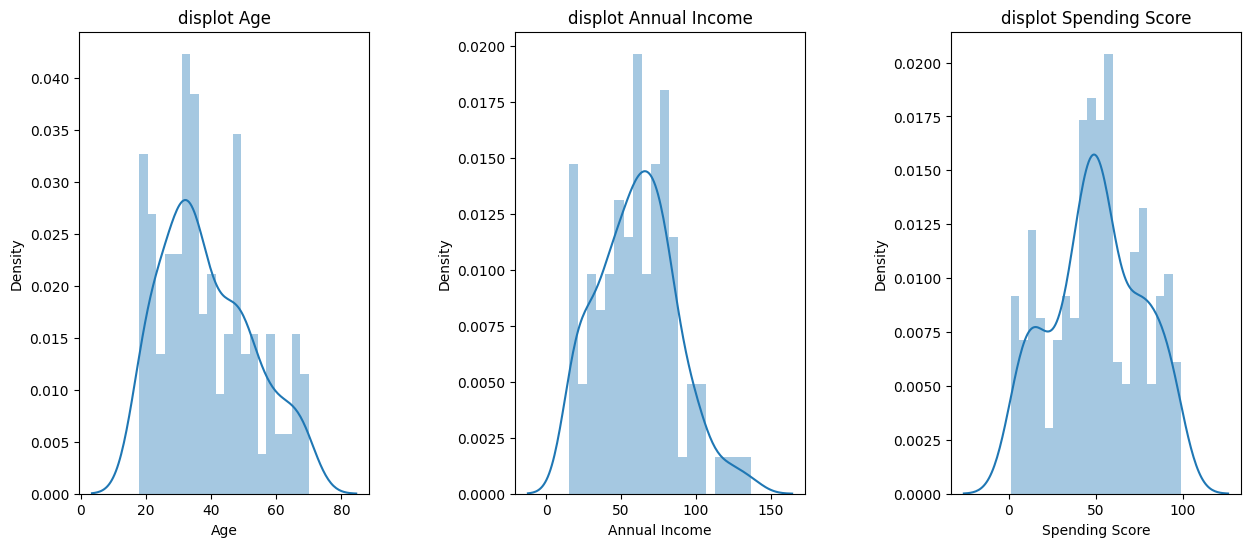

In [7]:
plt.figure(1, figsize=(15, 6))
n = 0

for x in ['Age', 'Annual Income', 'Spending Score']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('displot {}'.format(x))
plt.show()

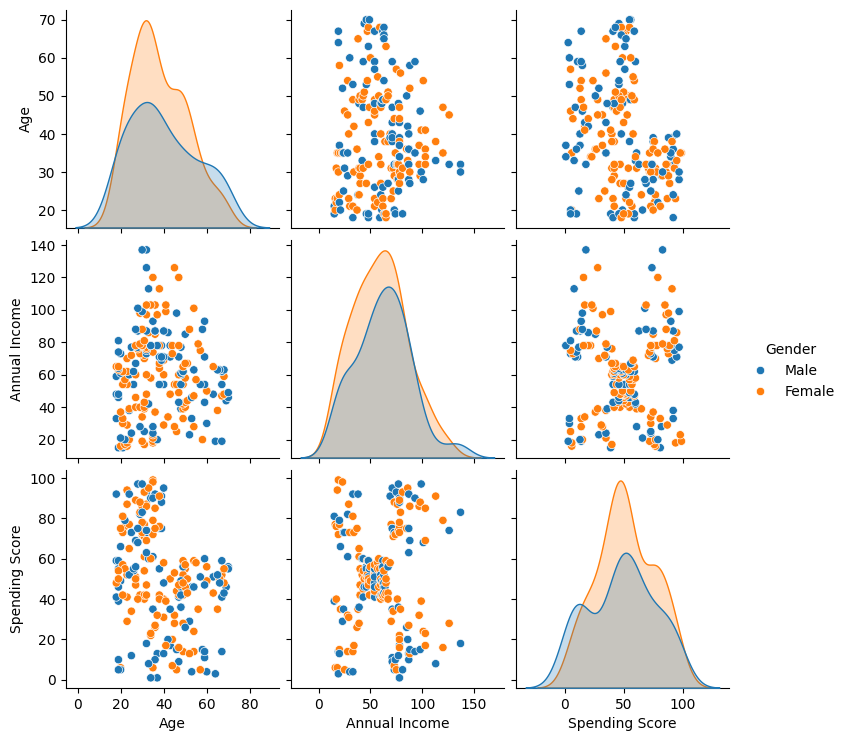

In [8]:
sns.pairplot(df, vars = ['Age', 'Annual Income', 'Spending Score'], hue = 'Gender')

## 2d clustering age n spending score

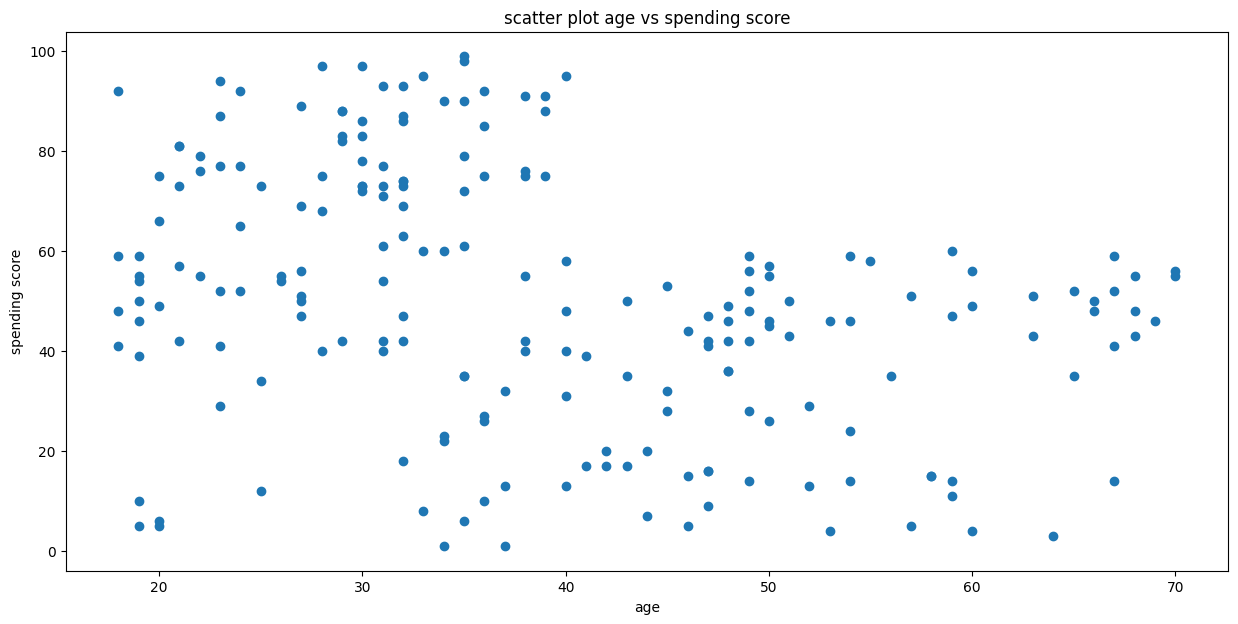

In [9]:
plt.figure(1, figsize=(15, 7))
plt.title('scatter plot age vs spending score')
plt.xlabel('age')
plt.ylabel('spending score')
plt.scatter(df['Age'], df['Spending Score'])
plt.show()

search k value

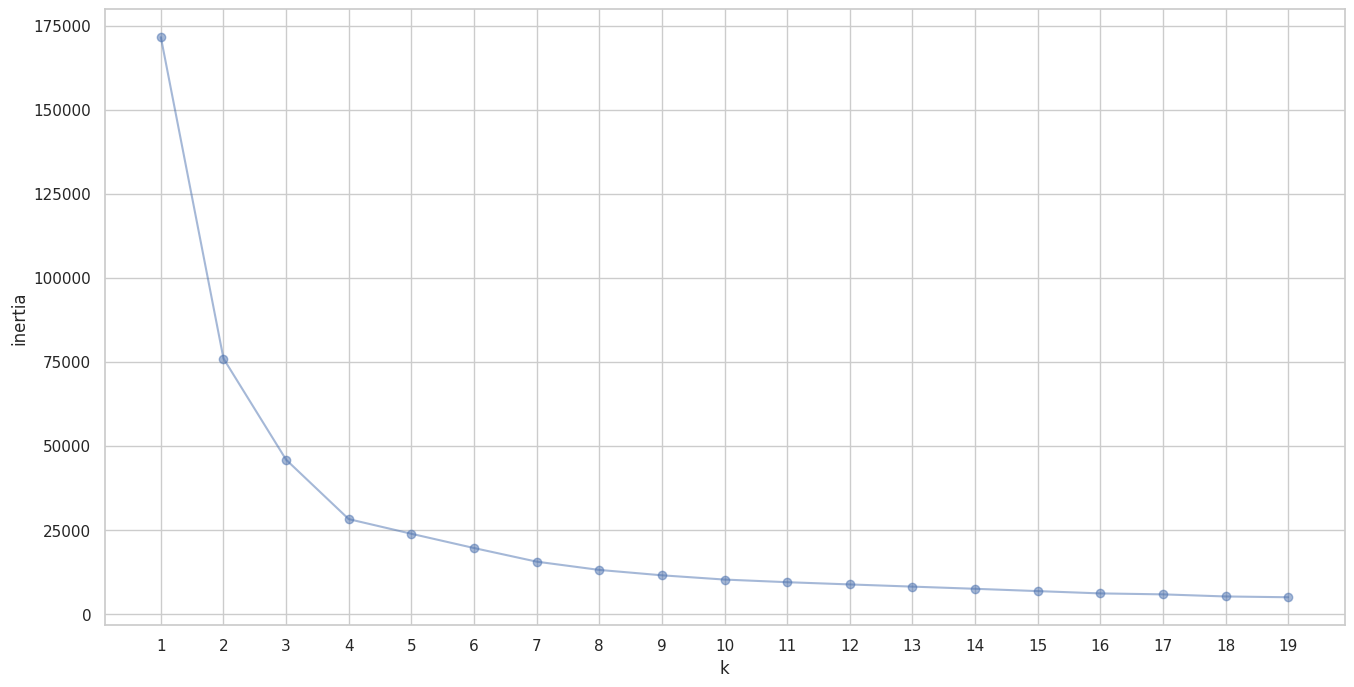

In [10]:
X1 = df[['Age', 'Spending Score']].iloc[:,:].values

inertia = []
K_range = range(1, 20)

for k in K_range:
    km = (KMeans(n_clusters = k ,
                 init='k-means++',
                 n_init = 10 ,
                 max_iter=300,
                 tol=0.0001,
                 random_state= 42,
                 algorithm='elkan')
    )
    km.fit(X1)
    inertia.append(km.inertia_)

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, inertia, 'o-', alpha=0.5)
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

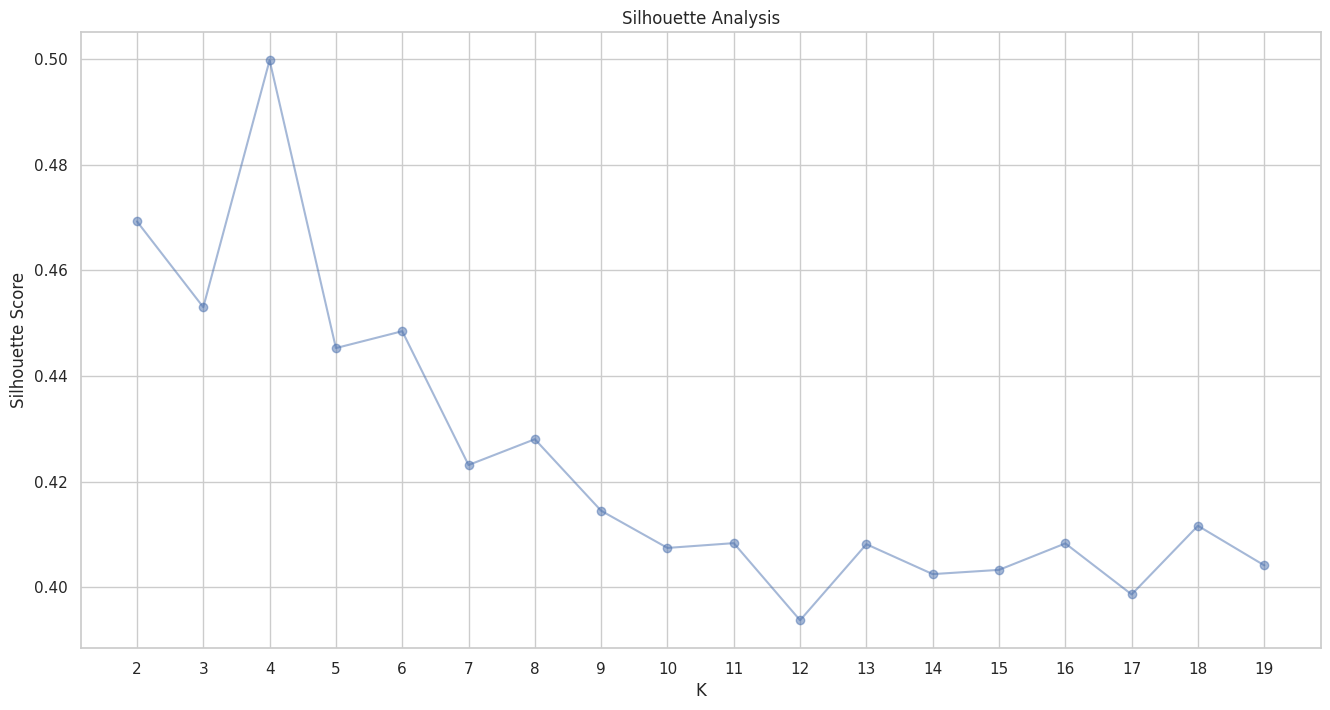

In [11]:
sil_scores = []
K_range = range(2, 20)

for k in K_range:
    km = (KMeans(
      n_clusters = k ,
      init='k-means++',
      n_init = 10 ,
      max_iter=300,
      tol=0.0001,
      random_state= 42,
      algorithm='elkan'
      )
    )
    labels = km.fit_predict(X1)
    sil_scores.append(silhouette_score(X1, labels))

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, sil_scores, 'o-', alpha=0.5)
plt.xlabel('K')
plt.xticks(K_range)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

training

k = 4

In [12]:
k = 4
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X1)
labels_1 = kmeans.labels_
centroids_1 = kmeans.cluster_centers_

In [13]:
score = silhouette_score(X1, labels_1)
print(f"skor: {score:.3f}")

skor: 0.500


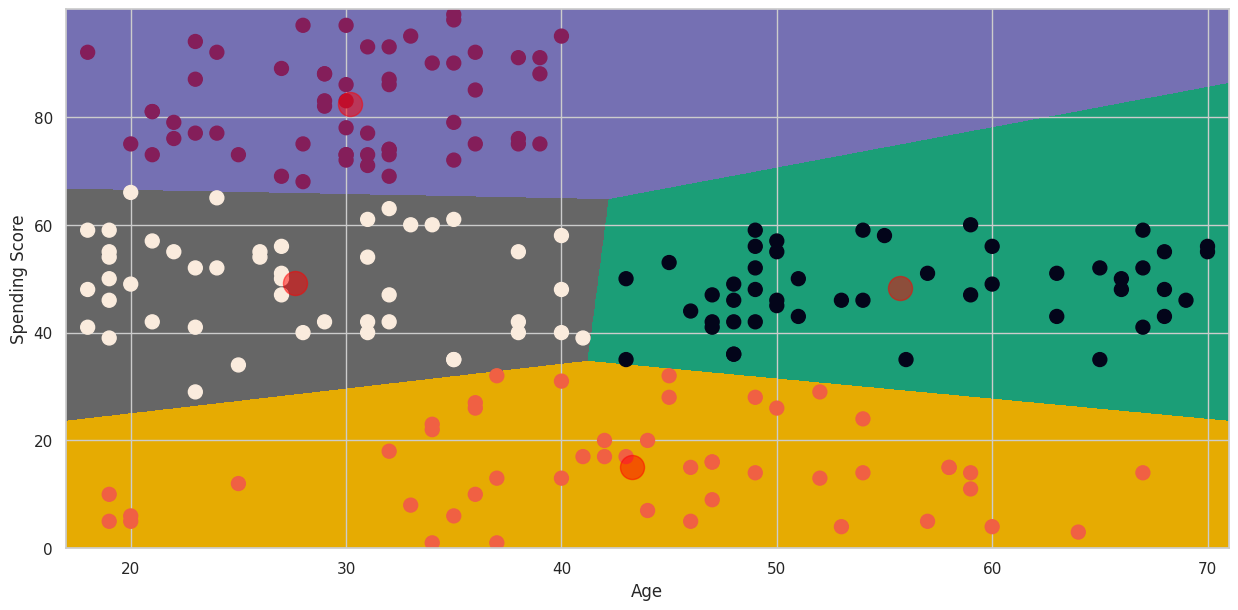

In [14]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Dark2', aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score', data = df, c = labels_1, s = 100)
plt.scatter(x = centroids_1[: , 0] , y =  centroids_1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

k = 5

In [15]:
k = 5
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X1)
labels_2 = kmeans.labels_
centroids_2 = kmeans.cluster_centers_

In [16]:
score = silhouette_score(X1, labels_2)
print(f"skor: {score:.3f}")

skor: 0.445


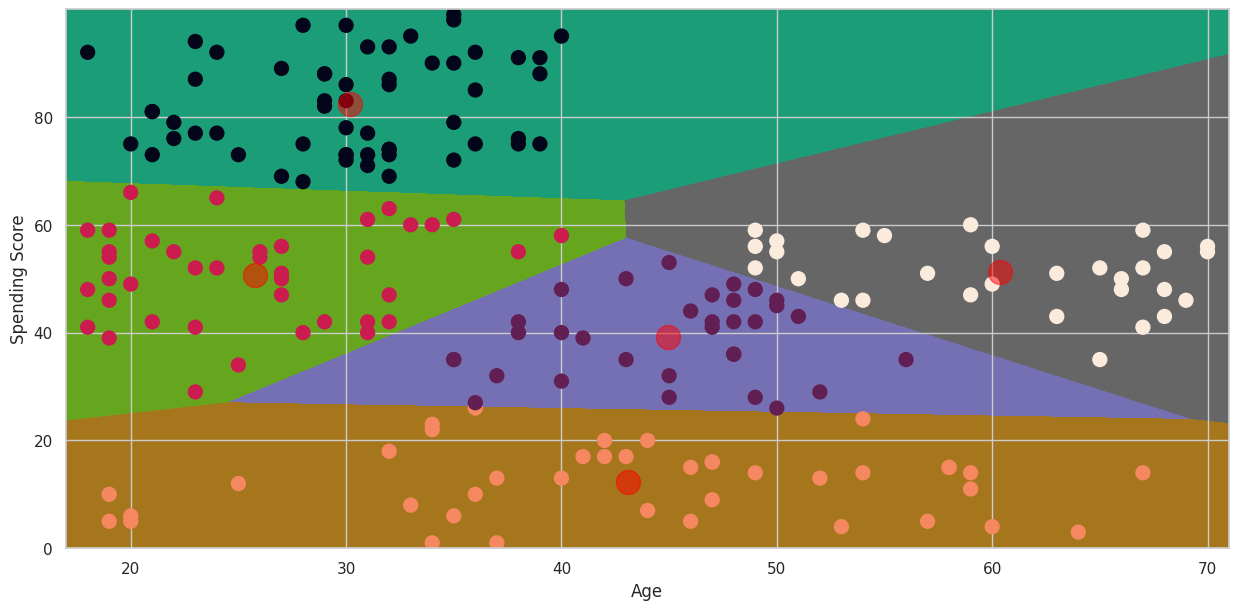

In [17]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Dark2', aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score', data = df, c = labels_2, s = 100)
plt.scatter(x = centroids_2[: , 0] , y =  centroids_2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

## 2d clustering age n annual income

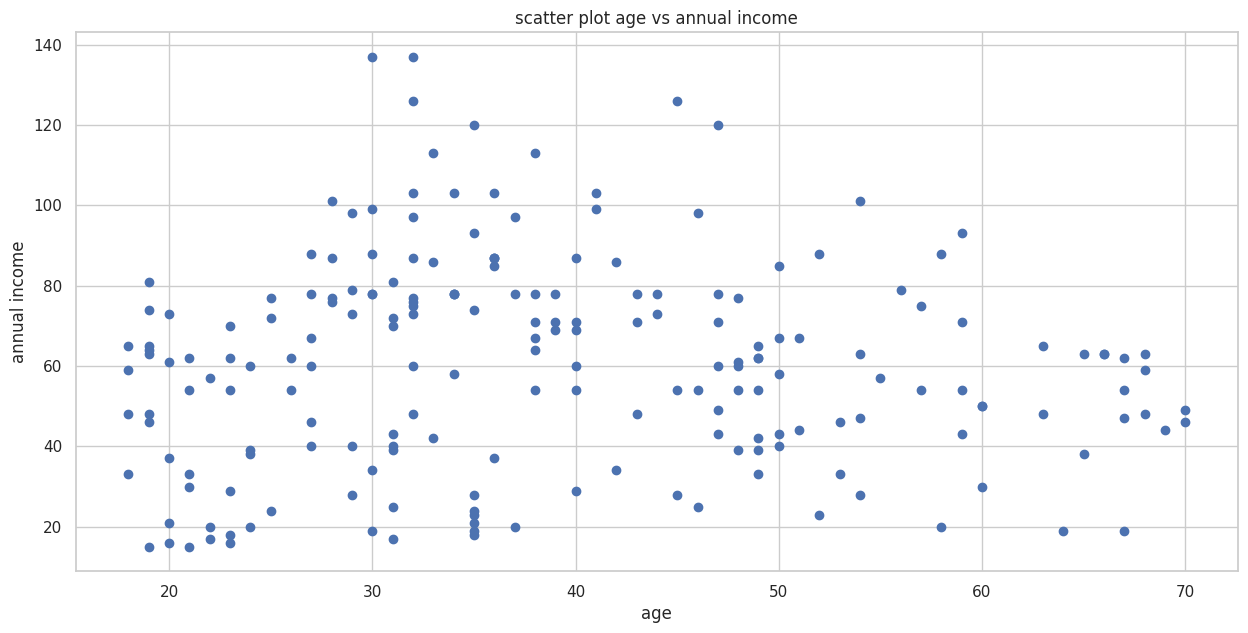

In [18]:
plt.figure(1, figsize=(15, 7))
plt.title('scatter plot age vs annual income')
plt.xlabel('age')
plt.ylabel('annual income')
plt.scatter(df['Age'], df['Annual Income'])
plt.show()

search k value

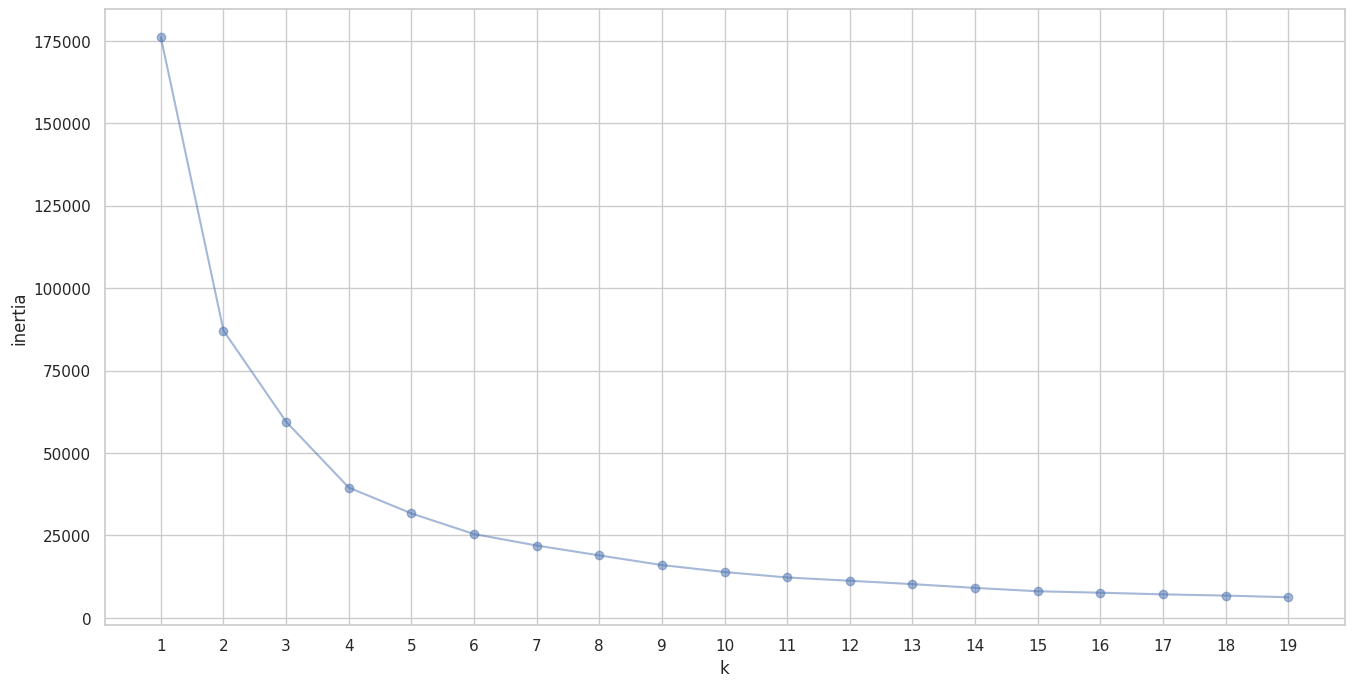

In [19]:
X2 = df[['Age', 'Annual Income']].iloc[:,:].values

inertia = []
K_range = range(1, 20)

for k in K_range:
    km = (KMeans(n_clusters = k ,
                 init='k-means++',
                 n_init = 10 ,
                 max_iter=300,
                 tol=0.0001,
                 random_state= 42,
                 algorithm='elkan')
    )
    km.fit(X2)
    inertia.append(km.inertia_)

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, inertia, 'o-', alpha=0.5)
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

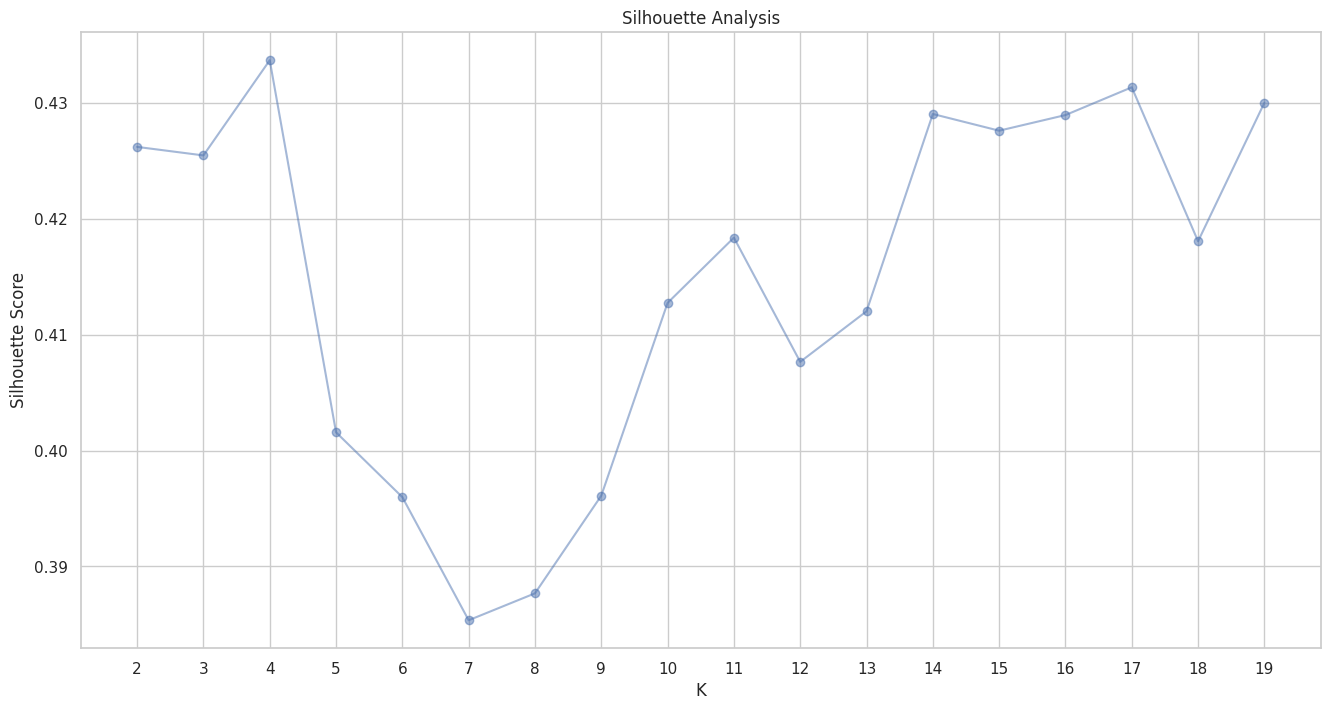

In [20]:
sil_scores = []
K_range = range(2, 20)

for k in K_range:
    km = (KMeans(
      n_clusters = k ,
      init='k-means++',
      n_init = 10 ,
      max_iter=300,
      tol=0.0001,
      random_state= 42,
      algorithm='elkan'
      )
    )
    labels = km.fit_predict(X2)
    sil_scores.append(silhouette_score(X2, labels))

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, sil_scores, 'o-', alpha=0.5)
plt.xlabel('K')
plt.xticks(K_range)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

k = 4

In [21]:
k = 4
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X2)
labels_2 = kmeans.labels_
centroids_2 = kmeans.cluster_centers_

In [22]:
score = silhouette_score(X2, labels_2)
print(f"skor: {score:.3f}")

skor: 0.434


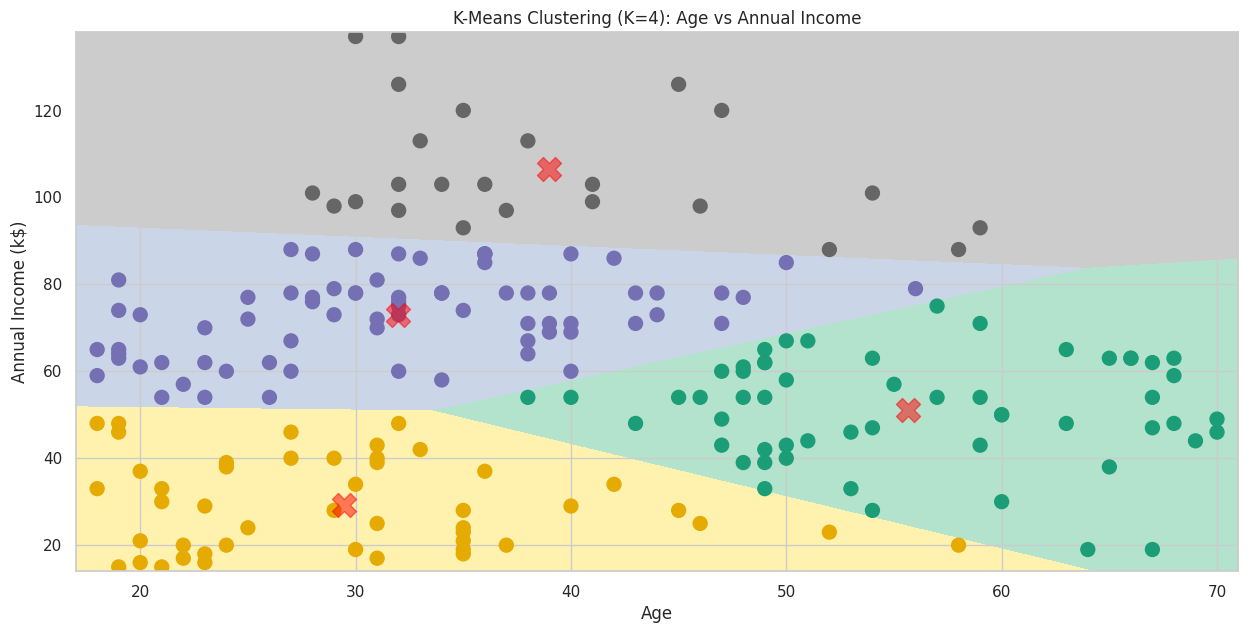

In [23]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel2', aspect = 'auto', origin='lower')

plt.scatter(x='Age', y='Annual Income', data=df, c=labels_2, s=100, cmap='Dark2')
plt.scatter(x=centroids_2[:, 0], y=centroids_2[:, 1], s=300, c='red', alpha=0.5, marker='X')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.title(f'K-Means Clustering (K={k}): Age vs Annual Income')
plt.show()

k = 17

In [24]:
k = 17
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X2)
labels_2 = kmeans.labels_
centroids_2 = kmeans.cluster_centers_

In [25]:
score = silhouette_score(X2, labels_2)
print(f"skor: {score:.3f}")

skor: 0.431


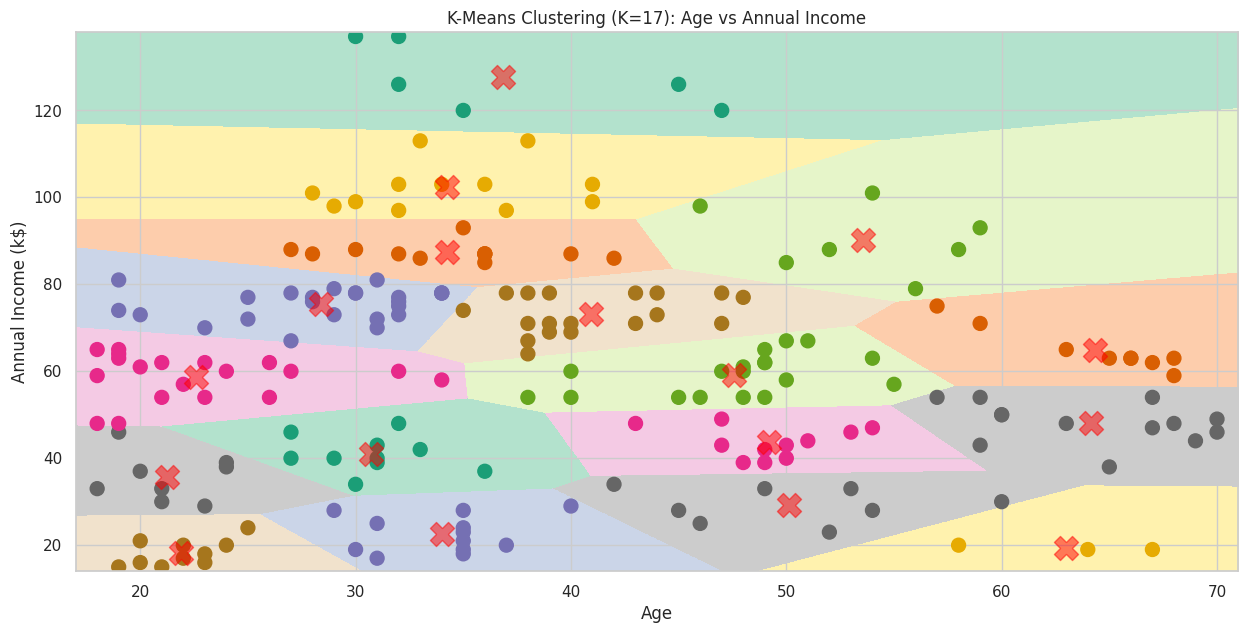

In [26]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel2', aspect = 'auto', origin='lower')

plt.scatter(x='Age', y='Annual Income', data=df, c=labels_2, s=100, cmap='Dark2')
plt.scatter(x=centroids_2[:, 0], y=centroids_2[:, 1], s=300, c='red', alpha=0.5, marker='X')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Age')
plt.title(f'K-Means Clustering (K={k}): Age vs Annual Income')
plt.show()

## 2d clustering spending score n annual income

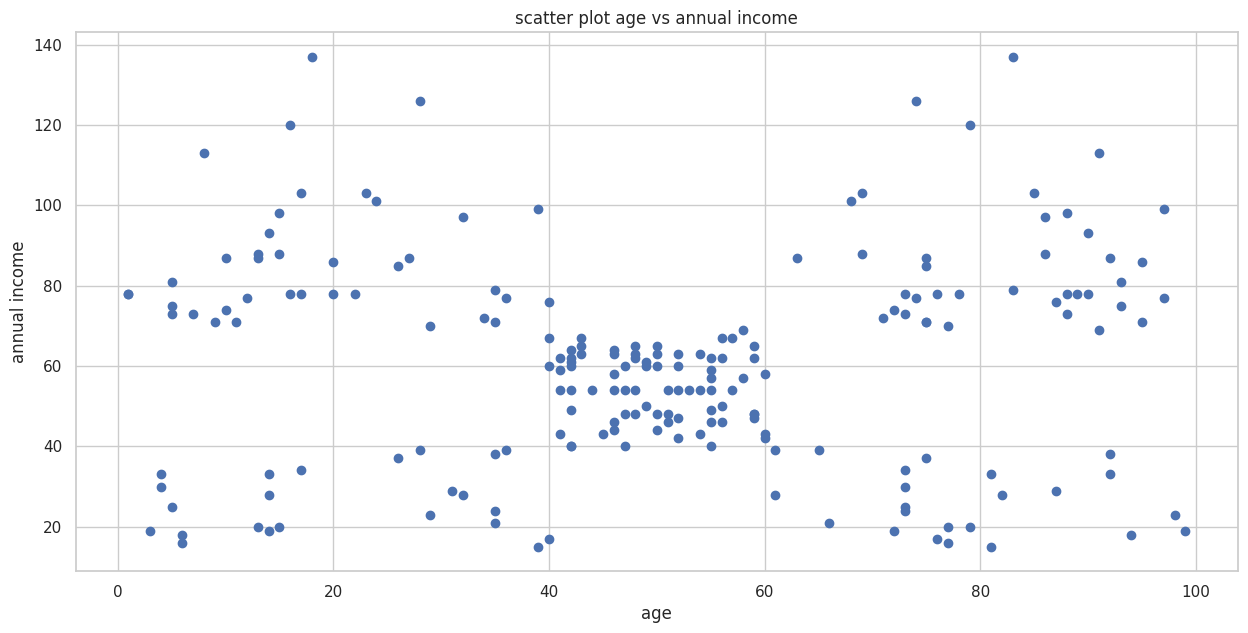

In [27]:
plt.figure(1, figsize=(15, 7))
plt.title('scatter plot age vs annual income')
plt.xlabel('age')
plt.ylabel('annual income')
plt.scatter(df['Spending Score'], df['Annual Income'])
plt.show()

search k value

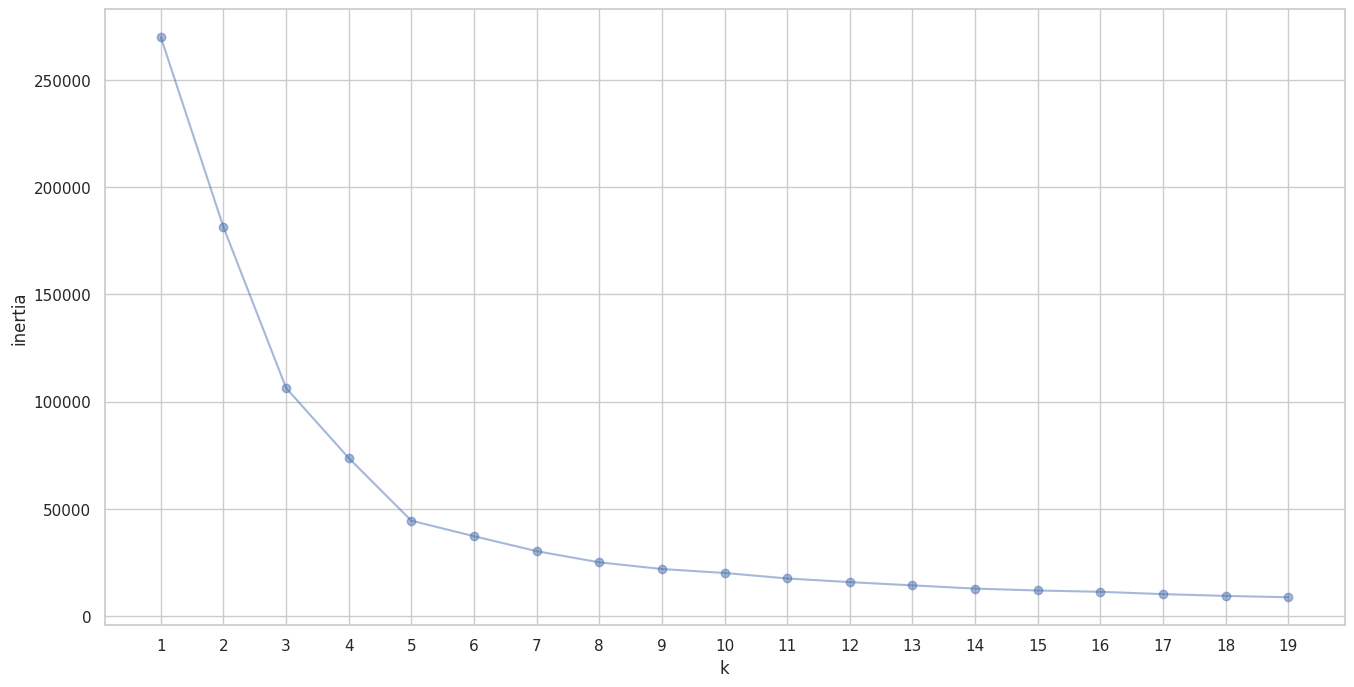

In [28]:
X3 = df[['Spending Score', 'Annual Income']].iloc[:,:].values

inertia = []
K_range = range(1, 20)

for k in K_range:
    km = (KMeans(n_clusters = k ,
                 init='k-means++',
                 n_init = 10 ,
                 max_iter=300,
                 tol=0.0001,
                 random_state= 42,
                 algorithm='elkan')
    )
    km.fit(X3)
    inertia.append(km.inertia_)

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, inertia, 'o-', alpha=0.5)
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

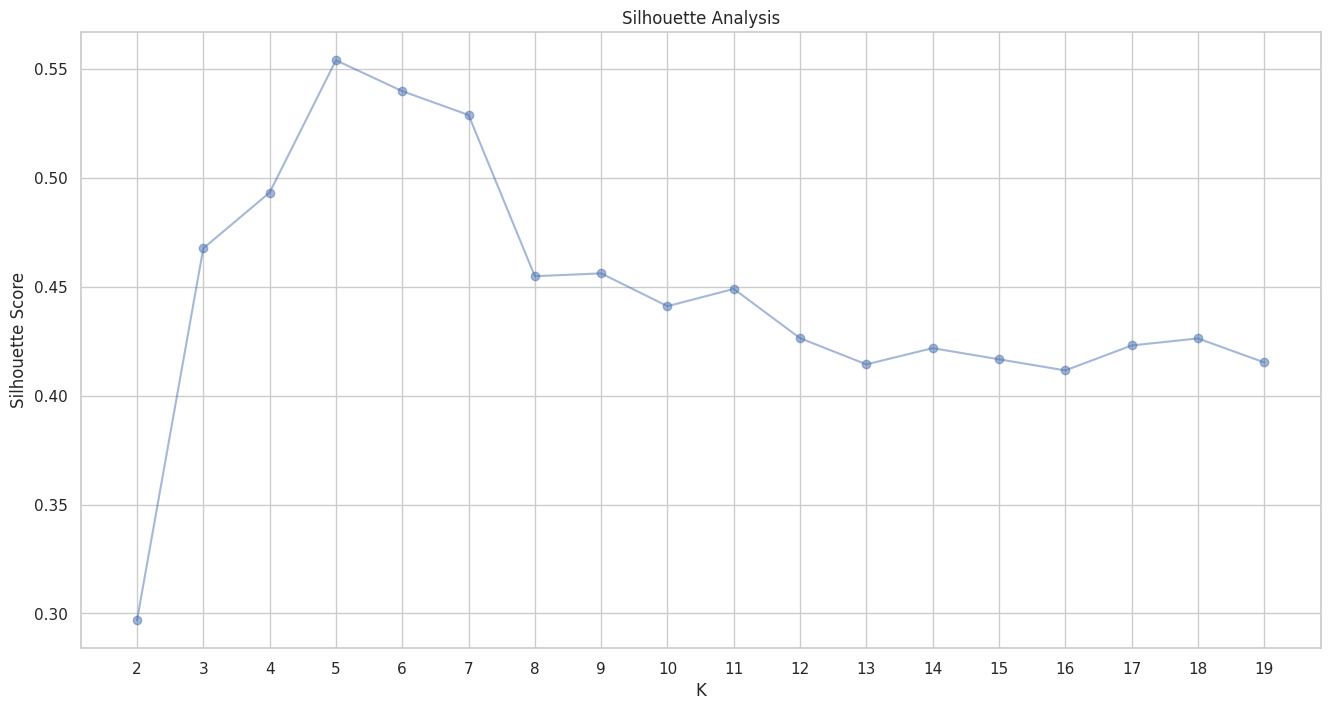

In [29]:
sil_scores = []
K_range = range(2, 20)

for k in K_range:
    km = (KMeans(
      n_clusters = k ,
      init='k-means++',
      n_init = 10 ,
      max_iter=300,
      tol=0.0001,
      random_state= 42,
      algorithm='elkan'
      )
    )
    labels = km.fit_predict(X3)
    sil_scores.append(silhouette_score(X3, labels))

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, sil_scores, 'o-', alpha=0.5)
plt.xlabel('K')
plt.xticks(K_range)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

k = 5

In [30]:
k = 5
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X3)
labels_3 = kmeans.labels_
centroids_3 = kmeans.cluster_centers_

In [31]:
score = silhouette_score(X3, labels_3)
print(f"skor: {score:.3f}")

skor: 0.554


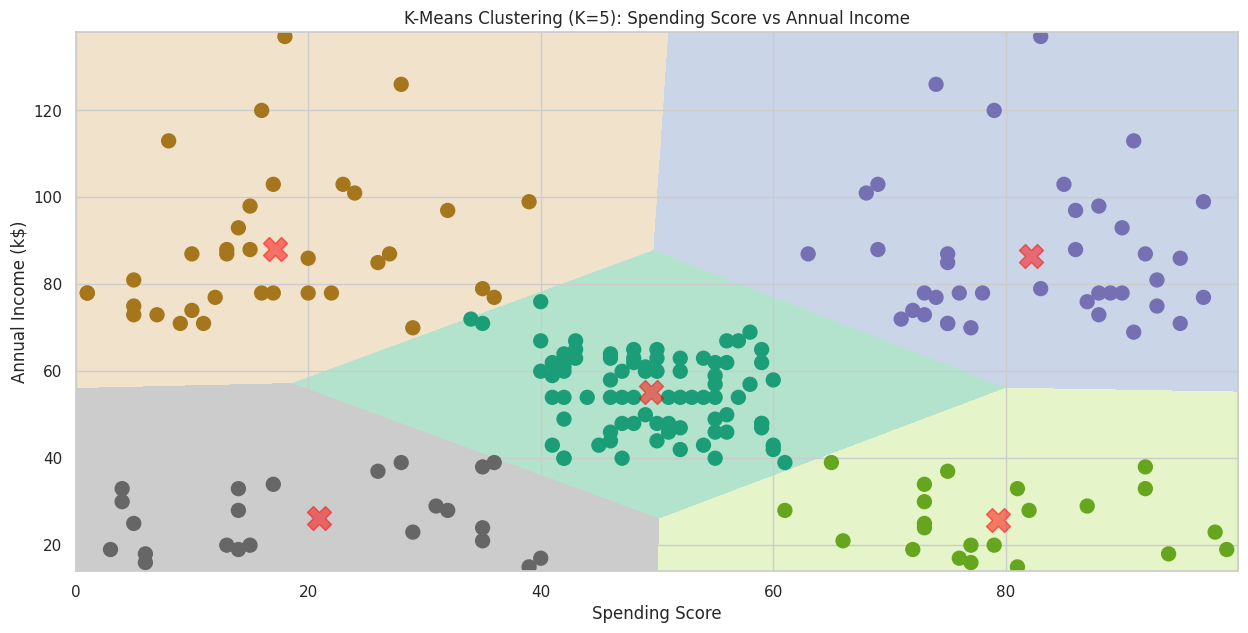

In [32]:
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel2', aspect = 'auto', origin='lower')

plt.scatter(x='Spending Score', y='Annual Income', data=df, c=labels_3, s=100, cmap='Dark2')
plt.scatter(x=centroids_3[:, 0], y=centroids_3[:, 1], s=300, c='red', alpha=0.5, marker='X')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score')
plt.title(f'K-Means Clustering (K={k}): Spending Score vs Annual Income')
plt.show()

k = 6

In [33]:
k = 6
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X3)
labels_3 = kmeans.labels_
centroids_3 = kmeans.cluster_centers_

In [34]:
score = silhouette_score(X3, labels_3)
print(f"skor: {score:.3f}")

skor: 0.540


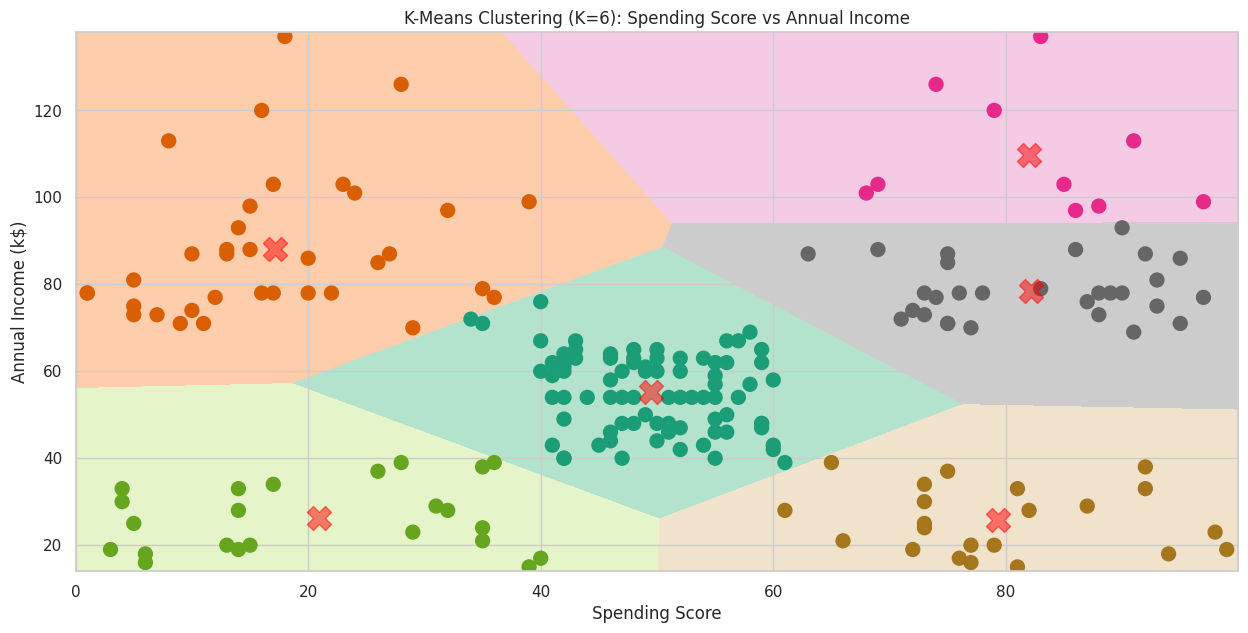

In [35]:
h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = 'Pastel2', aspect = 'auto', origin='lower')

plt.scatter(x='Spending Score', y='Annual Income', data=df, c=labels_3, s=100, cmap='Dark2')
plt.scatter(x=centroids_3[:, 0], y=centroids_3[:, 1], s=300, c='red', alpha=0.5, marker='X')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score')
plt.title(f'K-Means Clustering (K={k}): Spending Score vs Annual Income')
plt.show()

## 3d clustering for age, annual income, spending score

In [36]:
from mpl_toolkits.mplot3d import Axes3D

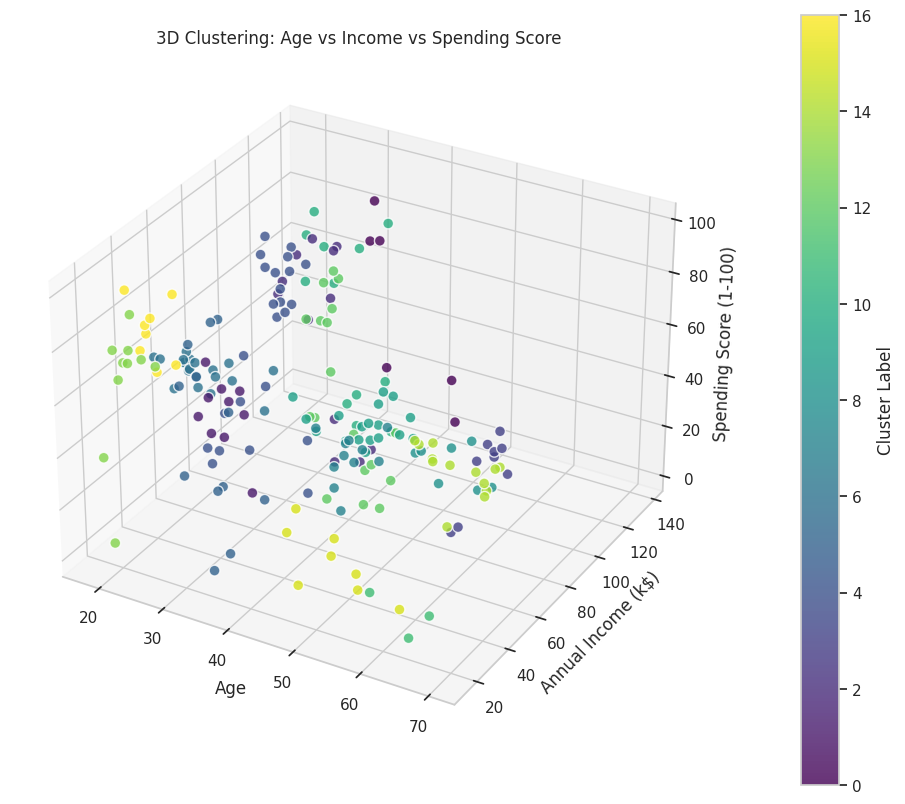

In [37]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

x = df['Age']
y = df['Annual Income']
z = df['Spending Score']

img = ax.scatter(x, y, z, c=labels_2, cmap='viridis', s=60, alpha=0.8, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Clustering: Age vs Income vs Spending Score')

fig.colorbar(img, ax=ax, label='Cluster Label', pad=0.1)
plt.show()

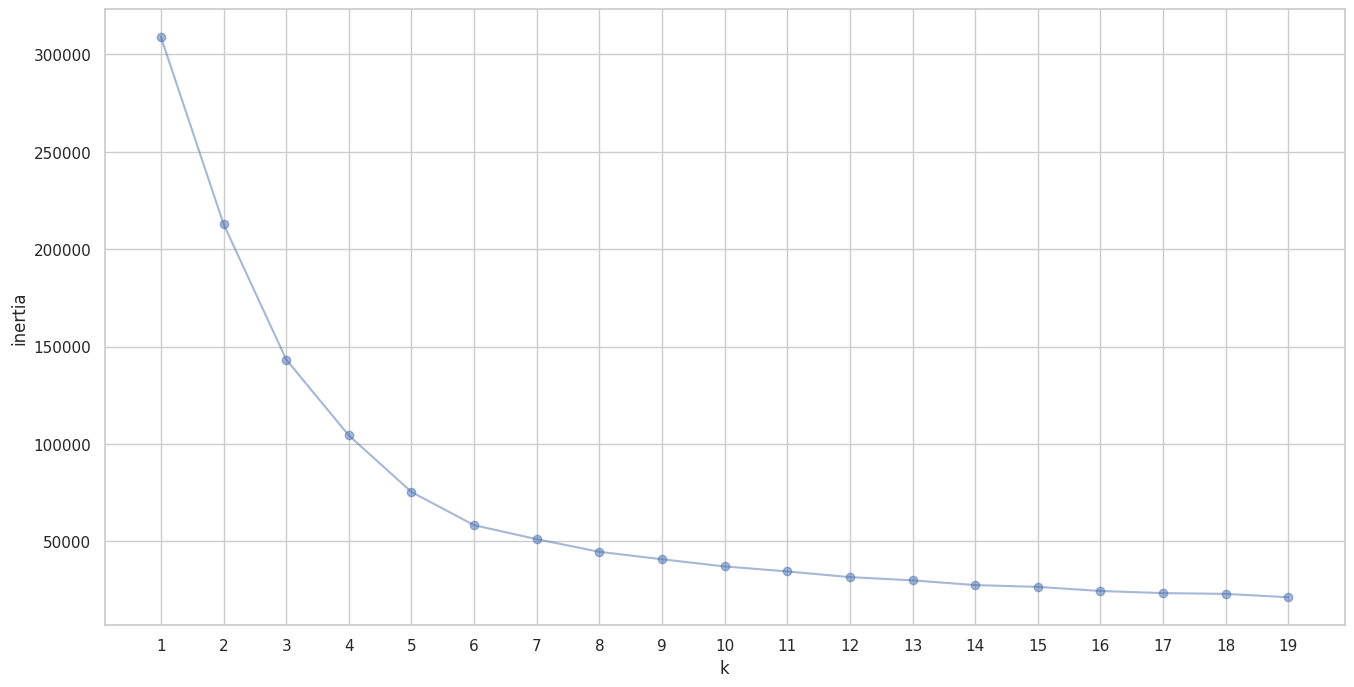

In [38]:
X4 = df[['Age', 'Annual Income', 'Spending Score']].iloc[:,:].values

inertia = []
K_range = range(1, 20)

for k in K_range:
    km = (KMeans(n_clusters = k ,
                 init='k-means++',
                 n_init = 10 ,
                 max_iter=300,
                 tol=0.0001,
                 random_state= 42,
                 algorithm='elkan')
    )
    km.fit(X4)
    inertia.append(km.inertia_)

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, inertia, 'o-', alpha=0.5)
plt.xticks(K_range)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

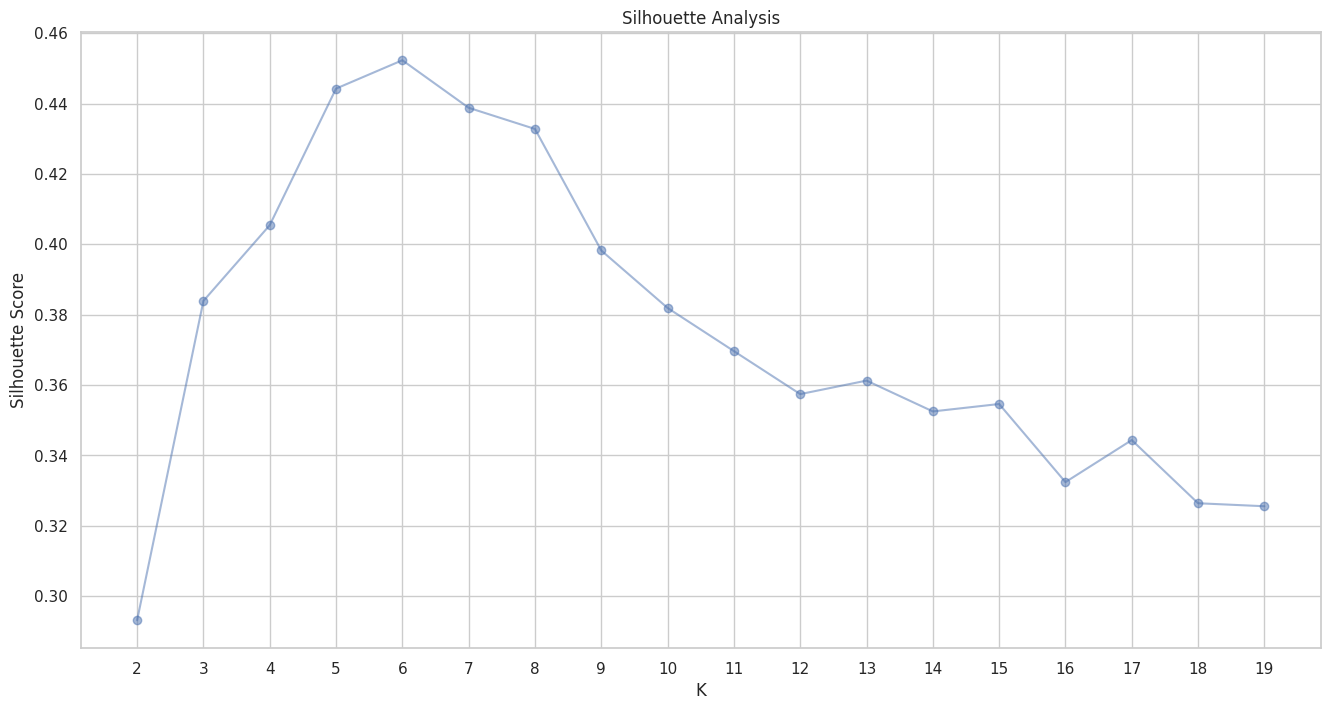

In [39]:
sil_scores = []
K_range = range(2, 20)

for k in K_range:
    km = (KMeans(
      n_clusters = k ,
      init='k-means++',
      n_init = 10 ,
      max_iter=300,
      tol=0.0001,
      random_state= 42,
      algorithm='elkan'
      )
    )
    labels = km.fit_predict(X4)
    sil_scores.append(silhouette_score(X4, labels))

sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
plt.plot(K_range, sil_scores, 'o-', alpha=0.5)
plt.xlabel('K')
plt.xticks(K_range)
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

k = 5

In [40]:
k = 5
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X4)
labels_4 = kmeans.labels_
centroids_4 = kmeans.cluster_centers_

y_kmeans = kmeans.fit_predict(X4)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [41]:
trace_1 = go.Scatter3d(
    x=df['Age'],
    y=df['Annual Income'],
    z=df['Spending Score'],
    mode='markers',
    marker=dict(
        color=df['cluster'],
        size=10,
        line=dict(
            color=df['cluster'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace_1]

layout = go.Layout(
    title='Clustering Age vs Income vs Spending Score',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

k = 6

In [42]:
k = 6
kmeans = KMeans(
    n_clusters = k ,
    init='k-means++',
    n_init = 10 ,
    max_iter=300,
    tol=0.0001,
    random_state= 42,
    algorithm='elkan'
    )
kmeans.fit(X4)
labels_4 = kmeans.labels_
centroids_4 = kmeans.cluster_centers_

y_kmeans = kmeans.fit_predict(X4)
df['cluster'] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


In [43]:
trace_1 = go.Scatter3d(
    x=df['Age'],
    y=df['Annual Income'],
    z=df['Spending Score'],
    mode='markers',
    marker=dict(
        color=df['cluster'],
        size=10,
        line=dict(
            color=df['cluster'],
            width=12
        ),
        opacity=0.8
    )
)

data = [trace_1]

layout = go.Layout(
    title='Clustering Age vs Income vs Spending Score',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Annual Income (k$)'),
        zaxis=dict(title='Spending Score (1-100)')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()